In [ ]:


from neo4j import GraphDatabase
import pandas as pd
from tabulate import tabulate
from dotenv import load_dotenv
import os


load_dotenv()  

NEO4J_URI = os.getenv("NEO4J_URI")
NEO4J_USER = os.getenv("NEO4J_USER")
NEO4J_PASSWORD = os.getenv("NEO4J_PASSWORD")

# ============================================================
# COMPLETE HELPER CLASS WITH ALL METHODS
# ============================================================
class QueryHelper:
    @staticmethod
    def run_query(driver, query, parameters=None):
        """Execute Cypher query and return results as DataFrame"""
        with driver.session() as session:
            result = session.run(query, parameters or {})
            records = [dict(record) for record in result]
            return pd.DataFrame(records) if records else pd.DataFrame()
    
    @staticmethod
    def display(df, title="Results", max_rows=15):
        """Pretty print results"""
        print("\n" + "=" * 100)
        print(f"📊 {title}")
        print("=" * 100)
        
        if df.empty:
            print("❌ No results found.")
            return
        
        display_df = df.head(max_rows).copy()
        for col in display_df.columns:
            if display_df[col].dtype == 'object':
                display_df[col] = display_df[col].apply(
                    lambda x: str(x)[:60] + "..." if isinstance(x, str) and len(str(x)) > 60 else str(x)
                )
        
        print(tabulate(display_df, headers='keys', tablefmt='grid', showindex=False))
        
        if len(df) > max_rows:
            print(f"\n... and {len(df) - max_rows} more rows")
        print(f"\n✅ Total rows returned: {len(df)}")
    
    @staticmethod
    def show_query(query):
        """Display the query being executed"""
        print("\n" + "🔍 " + "─" * 95)
        print("QUERY:")
        print("─" * 100)
        print(query.strip())
        print("─" * 100)

# ============================================================
# CONNECT TO NEO4J
# ============================================================
print("🔌 Connecting to Neo4j...")
driver = GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USER, NEO4J_PASSWORD))
helper = QueryHelper()

# Verify connection
try:
    with driver.session() as session:
        result = session.run("RETURN 'Successfully Connected!' as status")
        print(f"✅ {result.single()['status']}")
        
        # Database info
        nodes = session.run("MATCH (n) RETURN count(n) as count").single()["count"]
        rels = session.run("MATCH ()-[r]->() RETURN count(r) as count").single()["count"]
        
        print(f"\n📊 Database Overview:")
        print(f"   • Total Nodes: {nodes}")
        print(f"   • Total Relationships: {rels}")
        
    print("\n🎬 Ready to learn Cypher!")
    
except Exception as e:
    print(f"❌ Connection failed: {e}")
    print("\n🔧 Please check:")
    print("   1. Your credentials are correct in .env")
    print("   2. Neo4j Aura instance is running")
    print("   3. You have internet connection")


🔌 Connecting to Neo4j...
✅ Successfully Connected!

📊 Database Overview:
   • Total Nodes: 171
   • Total Relationships: 253

🎬 Ready to learn Cypher!


In [27]:
# ============================================================
# CELL: MOVIES DATASET OVERVIEW (CLEAN DISPLAY)
# ============================================================

# Query all movies
query = """
MATCH (m:Movie)
RETURN m
LIMIT 5
"""
helper.show_query(query)
raw_df = helper.run_query(driver, query)

# Extract properties from each Node into separate columns
movies_df = pd.json_normalize(raw_df['m'].apply(lambda x: x._properties if hasattr(x, '_properties') else {}))

# Display the cleaned dataframe
helper.display(movies_df, "Movies Dataset Sample (First 5 Rows)")



🔍 ───────────────────────────────────────────────────────────────────────────────────────────────
QUERY:
────────────────────────────────────────────────────────────────────────────────────────────────────
MATCH (m:Movie)
RETURN m
LIMIT 5
────────────────────────────────────────────────────────────────────────────────────────────────────

📊 Movies Dataset Sample (First 5 Rows)
+-----------------------------------------------------------------+------------------------+------------+
| tagline                                                         | title                  |   released |
+=================================================================+========================+============+
| Welcome to the Real World                                       | The Matrix             |       1999 |
+-----------------------------------------------------------------+------------------------+------------+
| Free your mind                                                  | The Matrix Reloaded  

# Let's Explore Cypher! 🚀

Welcome to the world of **Cypher**, the graph query language designed for querying the **Neo4j Database**! Think of it as the SQL for graph databases—perfect for navigating and uncovering insights from connected data. Ready to dive in? Let's make it fun and interactive!

## What is Cypher?

Cypher is your go-to tool for querying the Neo4j Database. Just like you’d use SQL to interact with a MySQL database, Cypher lets you explore nodes, relationships, and patterns in a graph with simple, intuitive queries.

### Try It Yourself!

Here’s a sample Cypher query to get you started. This query finds movies released after 2000 and returns the top 5. Copy it, paste it into your Neo4j environment, and see what happens!

```cypher
MATCH (m:Movie)
WHERE m.released > 2000
RETURN m LIMIT 5
```

**What’s happening here?**
- `MATCH (m:Movie)`: Finds nodes labeled as `Movie`.
- `WHERE m.released > 2000`: Filters for movies released after 2000.
- `RETURN m LIMIT 5`: Returns up to 5 matching movies.

### Your Turn!
Try tweaking the query! For example:
- Change `2000` to another year.
- Replace `LIMIT 5` with `LIMIT 10` to see more results.
- Add a property like `m.title` in the `RETURN` clause to get specific details.

In [31]:
# ============================================================
# CELL 2:  YOUR FIRST CYPHER QUERY
# ============================================================

# query = """
# MATCH (m:Movie)
# RETURN m.title AS title, m.released AS year
# LIMIT 5
# """
query= """MATCH (m:Movie)
WHERE m.released > 2000
RETURN m.title AS title, m.released AS year
LIMIT 5"""

helper.show_query(query)
results = helper.run_query(driver, query)
helper.display(results, "My First Cypher Query - Simple Movie List")


🔍 ───────────────────────────────────────────────────────────────────────────────────────────────
QUERY:
────────────────────────────────────────────────────────────────────────────────────────────────────
MATCH (m:Movie)
WHERE m.released > 2000
RETURN m.title AS title, m.released AS year
LIMIT 5
────────────────────────────────────────────────────────────────────────────────────────────────────

📊 My First Cypher Query - Simple Movie List
+------------------------+--------+
| title                  |   year |
+========================+========+
| The Matrix Reloaded    |   2003 |
+------------------------+--------+
| The Matrix Revolutions |   2003 |
+------------------------+--------+
| RescueDawn             |   2006 |
+------------------------+--------+
| Cloud Atlas            |   2012 |
+------------------------+--------+
| The Da Vinci Code      |   2006 |
+------------------------+--------+

✅ Total rows returned: 5


Expected Result: The above query will return all the movies that were released after the year 2000 limiting the result to 5 items.

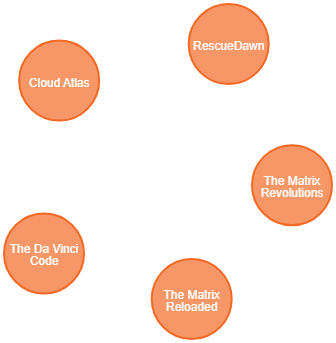

1.Write a query to retrieve all the movies released after the year 2005.

In [ ]:
MATCH (m:Movie)
WHERE m.released > 2005
RETURN m

2.Write a query to return the count of movies released after the year 2005. (Hint: you can use the COUNT(m) function to return the count)

MATCH (m:Movie)
WHERE m.released > 2005
RETURN count(m)




## 🔹 Nodes and Relationships — The Building Blocks of a Graph

In a **graph database**, everything is built around **nodes** and **relationships**.  
They form the foundation for representing connected data.

---

### 🟢 Nodes

**Nodes** represent **entities** or **objects** — similar to **rows** in a relational database table.

Each node can:
- Have a **label** (e.g., `Person`, `Movie`) that describes its type or category.
- Contain **properties** (key–value pairs) that store information about that entity.

Example:
(p:Person)


Here:
- `p` → is a **variable** (used within the Cypher query).  
- `Person` → is the **label** of the node type.

---

### 🎬 Example in Context

In a movie graph, we may have:
- A **Person** node representing an actor or director.
- A **Movie** node representing a film.

These nodes can later be connected through **relationships** like:
(:Person)-[:ACTED_IN]->(:Movie)



This means *a Person acted in a Movie* — forming the core of how we represent data in Neo4j.

---

✅ **Summary**
- **Nodes** = Entities (like rows in tables).  
- **Labels** = Categories or types (like table names).  
- **Properties** = Attributes describing the node.
- **Relationships** = Connections that define how nodes are related.

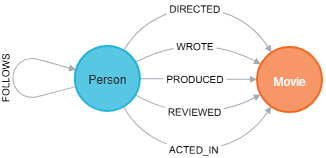

## 🔸 Relationships — Connecting the Nodes

**Relationships** describe how two nodes are **connected** in a graph.  
They define the **type of interaction** or **association** between entities.

---

### 🔗 Example of Relationships

In a movie graph, relationships might include:

- `(:Person)-[:ACTED_IN]->(:Movie)`  
- `(:Person)-[:DIRECTED]->(:Movie)`  
- `(:Person)-[:REVIEWED]->(:Movie)`  
- `(:Person)-[:PRODUCED]->(:Movie)`  
- `(:Person)-[:WROTE]->(:Movie)`

Each relationship represents a **specific role or connection** between nodes.

In [ ]:
MATCH (p:Person)-[d:DIRECTED]-(m:Movie)
WHERE m.released > 2010
RETURN p,d,m

Query to get all the people who acted in a movie that was released after 2010.

In [ ]:
MATCH (p:Person)-[r:ACTED_IN]-(m:Movie)
WHERE m.released > 2010
RETURN p,r,m

## 🏷️ Labels in Graph Databases

**Labels** identify the **type** of a node or relationship.

- Example: `Movie` and `Person` are **node labels**  
- `ACTED_IN`, `REVIEWED`, `DIRECTED` are **relationship types**

In **Cypher**, labels are written with a colon `:`  
Example:  
(p:Person)-[:ACTED_IN]->(m:Movie)



Here:
- `p` → variable  
- `Person` → label  

✅ **Use labels** to target specific node types in queries, e.g.:
MATCH (m:Movie) RETURN m.title

In [ ]:
MATCH (p:Person)
RETURN p
LIMIT 20

## 🧩 Properties in Graph Databases

**Properties** are **name–value pairs** used to store details about nodes or relationships.

Example:
MATCH (m:Movie)
RETURN m.title, m.released


🎯 Returns only the **title** and **released year** of each movie.

---

### 🧠 Try It Yourself

Get the name and birth year of all people:
MATCH (p:Person)
RETURN p.name, p.born



✅ Properties make graph data **rich and descriptive**, just like columns in a table.

In [ ]:
MATCH (m:Movie)
RETURN m.title, m.released

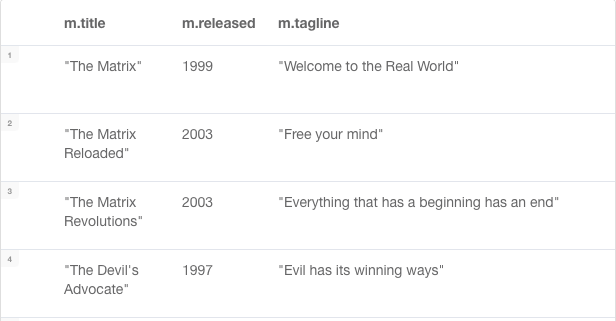

In [ ]:
MATCH (p:Person)
RETURN p.name, p.born

## 🏗️ Create a Node

The **CREATE** clause is used to make new **nodes or relationships** in Neo4j.

Example:
CREATE (p:Person {name: 'John Doe'})
RETURN p


🎯 Creates a new **Person** node with the property `name = 'John Doe'`.

---



In [ ]:
CREATE (p:Person {name: 'John Doe'})
RETURN p

### 🧠 Try It Yourself
Create a new Person node with your own name:
CREATE (p:Person {name: '<Your Name>'})
RETURN p



✅ Use **CREATE** to add data into your graph.

In [ ]:
CREATE (p:Person {name: '<Your Name>'})
RETURN p

## 🔍 Finding Nodes with MATCH and WHERE Clause

The **MATCH** clause is used to find nodes that fit a specific pattern — it’s the main way to query data in Neo4j.

Example:
MATCH (p:Person {name: 'Tom Hanks'})
RETURN p


🎯 Finds the **Person** node where `name = 'Tom Hanks'`.

---



In [ ]:
MATCH (p:Person {name: 'Tom Hanks'})
RETURN p

### 💡 Using WHERE for Filtering
The **WHERE** clause allows **advanced filtering** like comparisons and string conditions:

MATCH (p:Person)
WHERE p.born < 1970 OR p.name STARTS WITH 'T'
RETURN p.name, p.born



✅ Use **MATCH** to locate nodes and **WHERE** to refine results.


In [ ]:
MATCH (p:Person)
WHERE p.name = "Tom Hanks"
RETURN p

Try:

Find the movie with title "Cloud Atlas" 


Get all the movies that were released between 2010 and 2015.

## 🔄 MERGE Clause

The **MERGE** clause is used to:

1. **Match** existing nodes (if they already exist), or  
2. **Create** new ones (if they don’t).

It acts as a combination of **MATCH** and **CREATE**, ensuring that no duplicates are created.

In [ ]:
MERGE (p:Person {name: 'John Doe'})
ON CREATE SET p.createdAt = timestamp()
ON MATCH SET p.lastLoggedInAt = timestamp()
RETURN p

## 🔄 MERGE Clause Example



If the node does not exist, it is created and createdAt is set to the current timestamp.

If the node already exists, it is matched and lastLoggedInAt is updated with the current timestamp.

✅ MERGE ensures no duplicate nodes and allows different actions for creation vs match.












#### Task: Write a query using Merge to create a movie node with title "Greyhound". If the node does not exist then set its released property to 2020 and lastUpdatedAt property to the current time stamp. If the node already exists, then only set lastUpdatedAt to the current time stamp. Return the movie node.



# Create a Relationship

A Relationship connects 2 nodes.

## Example Cypher Query

```cypher
MATCH (p:Person), (m:Movie)
WHERE p.name = "Tom Hanks" AND m.title = "Cloud Atlas"
CREATE (p)-[w:WATCHED]->(m)
RETURN type(w)


The above statement will create a relationship :WATCHED between the existing Person and Movie nodes and return the type of relationship (i.e., WATCHED).

In [ ]:
MATCH (p:Person), (m:Movie)
WHERE p.name = "Tom Hanks" AND m.title = "Cloud Atlas"
CREATE (p)-[w:WATCHED]->(m)
RETURN type(w)

#### Task: Create a relationship :WATCHED between the node you created for yourself previously in step 6 and the movie Cloud Atlas and then return the type of created relationship

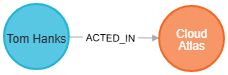

# Relationship Types

In Neo4j, there can be 2 kinds of relationships - incoming and outgoing. In the above picture, the Tom Hanks node is said to have an outgoing relationship while the Cloud Atlas node is said to have an incoming relationship.

Relationships always have a direction. However, you only have to pay attention to the direction where it is useful.

To denote an outgoing or an incoming relationship in Cypher, we use `→` or `←`.

## Example

```cypher
MATCH (p:Person)-[r:ACTED_IN]->(m:Movie)
RETURN p, r, m

In [ ]:
MATCH (p:Person)-[r:ACTED_IN]->(m:Movie)
RETURN p,r,m

# Relationship Direction

In the above query, Person has an outgoing relationship and Movie has an incoming relationship.

Although, in the case of the movies dataset, the direction of the relationship is not that important and even without denoting the direction in the query, it will return the same result. So the query can also be written without explicit direction:

## Example without Direction

```cypher
MATCH (p:Person)-[r:ACTED_IN]-(m:Movie)
RETURN p, r, m

In [ ]:
MATCH (p:Person)-[r:ACTED_IN]-(m:Movie)
RETURN p,r,m

This query will result the same answer as above

## Advanced Cypher Queries


### 1.Finding who directed Cloud Atlas movie

In [ ]:
MATCH (m:Movie {title: 'Cloud Atlas'})<-[d:DIRECTED]-(p:Person)
RETURN p.name

### 2. Finding all people who have co-acted with Tom Hanks in any movie

MATCH (tom:Person {name: "Tom Hanks"})-[:ACTED_IN]->(:Movie)<-[:ACTED_IN]-(p:Person)
RETURN p.name

### 3. Finding all people related to the movie Cloud Atlas in any way

In [ ]:
MATCH (p:Person)-[relatedTo]-(m:Movie {title: "Cloud Atlas"})
RETURN p.name, type(relatedTo)

### 4. Finding Movies and Actors that are 3 hops away from Kevin Bacon.

MATCH (p:Person {name: 'Kevin Bacon'})-[*1..3]-(hollywood)
RETURN DISTINCT p, hollywood

### Note: in the above query, hollywood refers to any node in the database (in this case Person and Movie nodes)